# ¿Cómo extraer datos de regiones? 
#### Haremos un scrapping en python utilizando la libreria BeautifulSoap.

En primer lugar, importaremos algunas librerias para poder hacer el scrapping. Y luego crearemos algunas funciones y estructuras de datos para facilitar la extracción de datos.

In [2]:
import requests
import re
from bs4 import BeautifulSoup

In [3]:
#Función que saca tildes y las ñ's
def normalizeText(text):
    newText = ''
    for char in text:
        if(char == 'á'):
            newText+='a'
        elif char == 'é':
            newText+='e'
        elif char == 'í':
            newText+='i'
        elif char == 'ó':
            newText+='o'
        elif char == 'ú':
            newText+='u'
        elif char == 'Ñ':
            newText+= 'N'
        elif char == "’":
            newText+= " "
        else:
             newText+=char
    return newText

# Dict para saber la id de las regiones
thisRegionDic = {
    "Arica y Parinacota":15,
    "Tarapaca":1,
    "Antofagasta": 2,
    "Atacama":3,
    "Coquimbo": 4,
    "Valparaiso" : 5,
    "Metropolitana": 13,
    "O Higgins": 6,
    "Maule": 7,
    "Nuble": 16,
    "Biobio":8,
    "Araucania": 9,
    "Los Rios": 14,
    "Los Lagos":10,
    "Aysen": 11,
    "Magallanes":12
}

Haremos un requests a la página del scrapping. Y utilizaremos funciones de beautifulSoap para trabajar el html

In [4]:
url_del_gobierno = 'https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/';
page = requests.get(url_del_gobierno)
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
#Ahora ya tenemos todo el html de la página y podemos comenzar a buscar la info que necesitamos
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9">
    <link rel="stylesheet" href="https://www.minsal.cl/wp-content/themes/gobcl-wp-master2/css/ie.css">
<![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
          Casos confirmados en Chile COVID-19 - Ministerio de Salud - Gobierno de Chile        </title>
<link href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,700italic,400,700" rel="stylesheet" type="text/css"/>
<link href="https://www.minsal.cl/wp-content/themes/gobcl-wp-master2/css/main.css" rel="stylesheet"/>
<link href="https://www.minsal.cl/wp-content/themes/gobcl-wp-master2/css/widget2018.css" rel="stylesheet"/>
<li

Ya con el html nos falta buscar la tabla donde el gobierno extrae la info, en ese caso usaremos un tag de clase en un div. Luego de eso, sera cosa de ejecutar un bucle e ir extrayendo los datos de cada fila

In [17]:
#Esta div contiene todos los datos, ahora conseguimos la table
table = soup.find_all('div',class_="contenido")[0]
table    

<div class="contenido">
<table border="1" style="border-collapse: collapse; width: 100%; height: 456px;">
<tbody>
<tr style="height: 24px;">
<td bgcolor="36A9E1" rowspan="2" style="width: 20%; height: 48px;"></td>
<td bgcolor="36A9E1" colspan="6" style="width: 120%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos COVID-19 en Chile</strong></span></td>
</tr>
<tr style="height: 24px;">
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos totales acumulados</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos nuevos<br/>
</strong></span><span style="color: #ffffff;"><strong>totales</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos<br/>
nuevos con síntomas</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text

In [20]:
currentTable = list(table.children)[1]
currentTbody = list(currentTable.children)[1]
currentTbody
#Ya con la table, y el tbody, solo falta filtrar un poco los datos

<tbody>
<tr style="height: 24px;">
<td bgcolor="36A9E1" rowspan="2" style="width: 20%; height: 48px;"></td>
<td bgcolor="36A9E1" colspan="6" style="width: 120%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos COVID-19 en Chile</strong></span></td>
</tr>
<tr style="height: 24px;">
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos totales acumulados</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos nuevos<br/>
</strong></span><span style="color: #ffffff;"><strong>totales</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos<br/>
nuevos con síntomas</strong></span></td>
<td bgcolor="36A9E1" style="width: 20%; text-align: center; height: 24px;"><span style="color: #ffffff;"><strong>Casos nuevos sin síntomas*</strong></

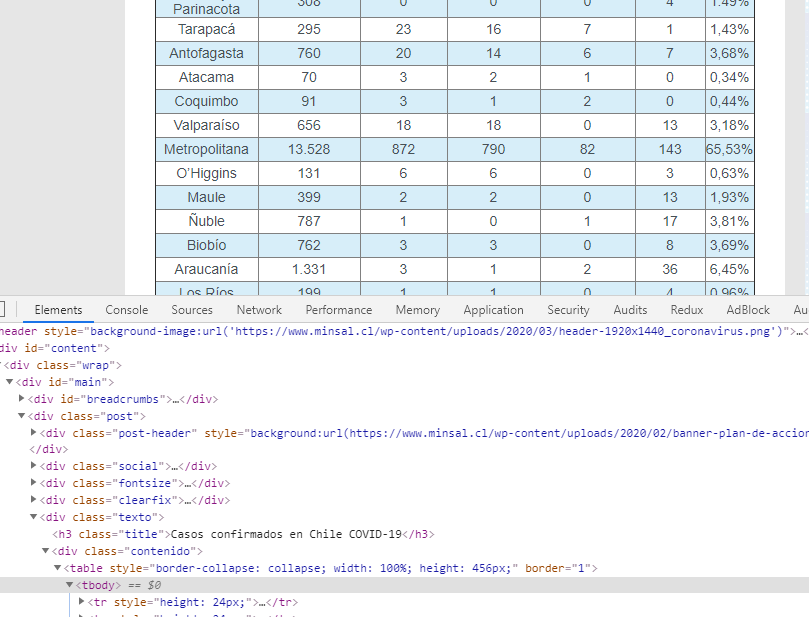
Es aqui dentro del tbody donde nos encontramos ahora, después cada TR representa una fila de la tabla. Es ahí donde aplicamos el bucle

In [34]:
#Con el find all encontramos todos los tr y aplicamos un bucle
filas_tabla_gobierno = currentTbody.find_all('tr')
#las dos primeras no nos sirven, porque es info del gobierno
filas_tabla_gobierno = filas_tabla_gobierno[2:]
filas_tabla_gobierno

[<tr bgcolor="D7EEF9" style="height: 24px;">
 <td style="width: 20%; text-align: center; height: 24px;">Arica y Parinacota</td>
 <td style="width: 20%; height: 24px; text-align: center;">308</td>
 <td style="width: 20%; height: 24px; text-align: center;">0</td>
 <td style="width: 20%; height: 24px; text-align: center;">0</td>
 <td style="width: 20%; height: 24px; text-align: center;">0</td>
 <td style="width: 20%; height: 24px; text-align: center;">4</td>
 <td style="width: 20%; height: 24px; text-align: center;">1.49%</td>
 </tr>,
 <tr style="height: 24px;">
 <td style="width: 20%; text-align: center; height: 24px;">Tarapacá</td>
 <td style="width: 20%; height: 24px; text-align: center;">295</td>
 <td style="width: 20%; height: 24px; text-align: center;">23</td>
 <td style="width: 20%; height: 24px; text-align: center;">16</td>
 <td style="width: 20%; height: 24px; text-align: center;">7</td>
 <td style="width: 20%; height: 24px; text-align: center;">1</td>
 <td style="width: 20%; hei

Antes de continuar haremos la estructura de nuestra info. Sera una matriz que en la primera fila contenga a todos los nombres de las columnas, y en las siguientes filas los datos correspondientes. Crearemos los nombres de las columnas

In [36]:
nombres_columnas = ["id_region","casos_totales","casos_nuevos","casos_nuevos_sintomas","casos_nuevos_nosintoma","fallecidos","porcentaje_total"]

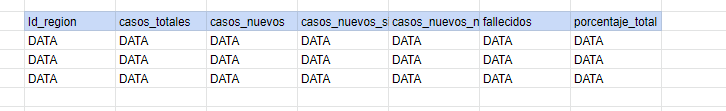 
La data organizda de esta forma de matriz

In [38]:
#Toda la data estara creada en un esta variable
data = [nombres_columnas]

A continuación, extraeremos todos los datos de las filas y lo guardaremos en la variable en forma de array. Una pequeña demostración de lo que haremos con dos bucles, se sugiere cambiar el "0" por otro número para ver como cambia las filas

In [52]:
for filas in filas_tabla_gobierno: 
    print(filas.find_all('td')[0].string)

Arica y Parinacota
Tarapacá
Antofagasta
Atacama
Coquimbo
Valparaíso
Metropolitana
O’Higgins
Maule
Ñuble
Biobío
Araucanía
Los Ríos
Los Lagos
Aysén
Magallanes
Total


In [61]:
for filas in filas_tabla_gobierno:
    info_array_region = []
    informacion_filas = filas.find_all('td')
    for info in informacion_filas:
        info_array_region.append(info.string)
    data.append(info_array_region)
    print(info_array_region)

['Arica y Parinacota', '308', '0', '0', '0', '4', '1.49%']
['Tarapacá', '295', '23', '16', '7', '1', '1,43%']
['Antofagasta', '760', '20', '14', '6', '7', '3,68%']
['Atacama', '70', '3', '2', '1', '0', '0,34%']
['Coquimbo', '91', '3', '1', '2', '0', '0,44%']
['Valparaíso', '656', '18', '18', '0', '13', '3,18%']
['Metropolitana', '13.528', '872', '790', '82', '143', '65,53%']
['O’Higgins', '131', '6', '6', '0', '3', '0,63%']
['Maule', '399', '2', '2', '0', '13', '1,93%']
['Ñuble', '787', '1', '0', '1', '17', '3,81%']
['Biobío', '762', '3', '3', '0', '8', '3,69%']
['Araucanía', '1.331', '3', '1', '2', '36', '6,45%']
['Los Ríos', '199', '1', '1', '0', '4', '0,96%']
['Los Lagos', '524', '7', '5', '2', '10', '2,54%']
['Aysén', '7', '0', '0', '0', '0', '0,03%']
['Magallanes', '795', '18', '17', '1', '11', '3,85%']
['Total', '20.643', '980', '876', '104', '270', '100%']


In [62]:
data

[['id_region',
  'casos_totales',
  'casos_nuevo',
  'casos_nuevos_sintomas',
  'casos_nuevos_nosintoma',
  'fallecidos',
  'porcentaje_total'],
 ['Arica y Parinacota', '308', '0', '0', '0', '4', '1.49%'],
 ['Tarapacá', '295', '23', '16', '7', '1', '1,43%'],
 ['Antofagasta', '760', '20', '14', '6', '7', '3,68%'],
 ['Atacama', '70', '3', '2', '1', '0', '0,34%'],
 ['Coquimbo', '91', '3', '1', '2', '0', '0,44%'],
 ['Valparaíso', '656', '18', '18', '0', '13', '3,18%'],
 ['Metropolitana', '13.528', '872', '790', '82', '143', '65,53%'],
 ['O’Higgins', '131', '6', '6', '0', '3', '0,63%'],
 ['Maule', '399', '2', '2', '0', '13', '1,93%'],
 ['Ñuble', '787', '1', '0', '1', '17', '3,81%'],
 ['Biobío', '762', '3', '3', '0', '8', '3,69%'],
 ['Araucanía', '1.331', '3', '1', '2', '36', '6,45%'],
 ['Los Ríos', '199', '1', '1', '0', '4', '0,96%'],
 ['Los Lagos', '524', '7', '5', '2', '10', '2,54%'],
 ['Aysén', '7', '0', '0', '0', '0', '0,03%'],
 ['Magallanes', '795', '18', '17', '1', '11', '3,85%'],
 ['

In [63]:
#Ahora queda utilizar pandas